# # EB5204 New Media & Sentiment Mining - Naive Bayes and SVM Classifier ()

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import os
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from nltk.classify import NaiveBayesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import itertools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

### Load 1 review dataset

In [2]:
with open(os.path.join('data', 'yelp_menya-musashi-singapore?start=.json')) as read_file:
    reviews = json.load(read_file)

In [3]:
len(reviews['review'])

18

In [4]:
reviews['review'][0]

{'author': 'Conan H.',
 'datePublished': '2013-01-22',
 'description': "Its above average as ramen goes - and a real value meal if you order the tsukemen because you can order up to 5 portions of noodles for the same price. Perfect for the hungry hippo.\n\nThe black soup comes recommended. Service is typical Singaporean nonsense.\n\nI lived in Tokyo for over a decade and am a purveyor of good ramen. 5 years ago there were only mediocre places. Now you have this, Ippudou and Tonkotsu King. I'd say the latter is one of the best.",
 'reviewRating': {'ratingValue': 4}}

In [5]:
reviews['aggregateRating']

{'@type': 'AggregateRating', 'ratingValue': 3.5, 'reviewCount': 18}

### Load all the reviews

In [6]:
reviews = []
for afile in os.listdir('data'):
    if os.path.isfile(os.path.join('data', afile)):
        print(afile)
        with open(os.path.join('data', afile)) as read_file:
            reviews.append(json.load(read_file))

yelp_first-thai-food-singapore?start=.json
yelp_trattoria-lafiandra-singapore-2?start=.json
yelp_khansama-tandoori-singapore?osq=indian?start=.json
yelp_zam-zam-restaurant-singapore?osq=indian?start=.json
yelp_garibaldi-italian-restaurant-and-bar-singapore-2?start=.json
yelp_yhingthai-palace-singapore-2?start=.json
yelp_jai-thai-singapore?start=.json
yelp_el-mero-mero-singapore?start=.json
yelp_vatos-urban-tacos-singapore?start=.json
yelp_prego-singapore?start=.json
yelp_lei-garden-singapore-2?start=.json
yelp_piedra-negra-singapore?start=.json
yelp_komala-vilas-restaurant-singapore?osq=indian?start=.json
yelp_the-curry-cultures-no-title?osq=indian?start=.json
yelp_osaka-ohsho-singapore?start=.json
yelp_menya-musashi-singapore?start=.json
yelp_din-tai-fung-singapore-4?start=.json
yelp_tim-ho-wan-singapore-7?start=.json
yelp_caf%C3%A9-iguana-singapore-2?start=.json
yelp_standing-sushi-bar-singapore?start=.json


In [7]:
len(reviews)

20

### Check the total number of reviews

In [8]:
total_reviews = sum([ len(i['review']) for i in reviews ])
total_reviews

661

In [9]:
reviews[2].keys()

dict_keys(['aggregateRating', 'review', 'servesCuisine', 'priceRange', 'name', 'address', '@context', 'image', '@type', 'telephone'])

In [10]:
reviews[2]['review'][7]

{'author': 'Maggie C.',
 'datePublished': '2018-08-20',
 'description': 'Every dish we got was excellent: vegetable pakora, agra chaat, garlic naan, fish tikka and aloo matter.  Service was quick and attentive.',
 'reviewRating': {'ratingValue': 4}}

In [11]:
reviews[2]['name']

'Khansama Tandoori'

In [12]:
reviews[2]['servesCuisine']

'Indian'

### Put the reviews into a data frame

In [13]:
df_list = []
for a_restaurant in reviews:
    
    a_df = pd.DataFrame(a_restaurant['review'])
    a_df['reviewRating'] = a_df['reviewRating'].apply(lambda x: x['ratingValue'])
    a_df['name'] = a_restaurant['name']
    a_df['cuisine'] = a_restaurant['servesCuisine']
    df_list.append(a_df)

reviews_df = pd.concat(df_list)
reviews_df.head()

,author,datePublished,description,reviewRating,name,cuisine
0,Karen W.,2017-02-22,"If you love strong flavours, you'll dig the Du...",4,First Thai Food,Thai
1,Chan L.,2017-11-12,It's a hit or miss here. This time they tried ...,1,First Thai Food,Thai
2,Max C.,2017-08-03,"Total disaster, don't order the duck soup nood...",2,First Thai Food,Thai
3,Carolyn L.,2014-08-01,"The place can get super crowded, especially af...",4,First Thai Food,Thai
4,Ernie K.,2012-09-27,I simply love this place. Not the service or ...,4,First Thai Food,Thai


In [14]:
len(reviews_df)

In [15]:
reviews_df.groupby('cuisine').size()

cuisine
Dim Sum                37
French                 22
Indian                244
Italian                30
Japanese               41
Mexican               142
Ramen                  18
Shanghainese           43
Tapas/Small Plates     40
Thai                   44
dtype: int64

In [16]:
reviews_df[reviews_df['cuisine'].str.contains('Tapas')]

,author,datePublished,description,reviewRating,name,cuisine
0,Kevin W.,2018-05-27,We have been on the hunt for some good Mexican...,4,Café Iguana,Tapas/Small Plates
1,Ka L.,2018-08-15,Happy hour at Cafe Iguana ($40 for a jug of ma...,3,Café Iguana,Tapas/Small Plates
2,Robert B.,2017-08-23,Walked by this place from my hotel. Was very c...,5,Café Iguana,Tapas/Small Plates
3,J P.,2018-08-06,Food is pretty good but it's a touristy area s...,3,Café Iguana,Tapas/Small Plates
4,Yonji H.,2017-02-25,"I like it. The food is good, the atmosphere is...",5,Café Iguana,Tapas/Small Plates
5,Gaurav B.,2017-10-01,Very good \n food and service. Would definitel...,4,Café Iguana,Tapas/Small Plates
6,Li T.,2015-06-17,With a good selection of Mexican special cockt...,3,Café Iguana,Tapas/Small Plates
7,Jeannie L.,2015-09-17,Touristy spot serving barely edible tex-mex.\n...,2,Café Iguana,Tapas/Small Plates
8,Sam K.,2017-04-20,This was awesome! The food was great! Customer...,5,Café Iguana,Tapas/Small Plates
9,Troy E.,2015-11-07,This trip was my second to Cafe Iguana and my ...,4,Café Iguana,Tapas/Small Plates


In [17]:
reviews_df.loc[reviews_df['cuisine'].str.contains('Tapas'), 'cuisine'] = 'Mexican'

In [18]:
reviews_df.groupby('cuisine').size()

cuisine
Dim Sum          37
French           22
Indian          244
Italian          30
Japanese         41
Mexican         182
Ramen            18
Shanghainese     43
Thai             44
dtype: int64

In [19]:
reviews_df.loc[reviews_df['cuisine'].str.contains('Ramen'), 'cuisine'] = 'Japanese'
reviews_df.loc[reviews_df['cuisine'].str.contains('Shanghainese'), 'cuisine'] = 'Chinese'
reviews_df.loc[reviews_df['cuisine'].str.contains('Dim Sum'), 'cuisine'] = 'Chinese'

In [20]:
reviews_df.groupby('cuisine').size()

cuisine
Chinese      80
French       22
Indian      244
Italian      30
Japanese     59
Mexican     182
Thai         44
dtype: int64

### Convert the ratings to positive and negative

In [21]:
reviews_df['PosNeg'] = reviews_df['reviewRating'].apply(lambda x: 1 if x > 3 else -1)
reviews_df.head()

,author,datePublished,description,reviewRating,name,cuisine,PosNeg
0,Karen W.,2017-02-22,"If you love strong flavours, you'll dig the Du...",4,First Thai Food,Thai,1
1,Chan L.,2017-11-12,It's a hit or miss here. This time they tried ...,1,First Thai Food,Thai,-1
2,Max C.,2017-08-03,"Total disaster, don't order the duck soup nood...",2,First Thai Food,Thai,-1
3,Carolyn L.,2014-08-01,"The place can get super crowded, especially af...",4,First Thai Food,Thai,1
4,Ernie K.,2012-09-27,I simply love this place. Not the service or ...,4,First Thai Food,Thai,1


### Load the reviews standard set

In [22]:
with open(os.path.join('data', 'others', 'yelp_2.json')) as read_file:
    std_reviews = json.load(read_file)

In [23]:
std_reviews.keys()

dict_keys(['0', '20'])

In [24]:
df_list = []
for i in std_reviews.keys():
    
    a_df = pd.DataFrame(std_reviews[i]['review'])
    a_df['reviewRating'] = a_df['reviewRating'].apply(lambda x: x['ratingValue'])
    a_df['name'] = std_reviews[i]['name']
    a_df['cuisine'] = std_reviews[i]['servesCuisine']
    df_list.append(a_df)

std_reviews_df = pd.concat(df_list)
std_reviews_df.head()

,author,datePublished,description,reviewRating,name,cuisine
0,Tanmay A.,2017-05-19,The service at Sushi Bar was great with an ext...,5,The Sushi Bar,Sushi Bars
1,Alex L.,2017-04-06,OMG Yelp let me down big time. I don't know h...,2,The Sushi Bar,Sushi Bars
2,Jenn W.,2017-07-01,Heard that this was the best sushi joint in Si...,4,The Sushi Bar,Sushi Bars
3,Nicola L.,2017-12-17,Ebi fry salmon Aburizal ($17.90++) - 3 stars\n...,3,The Sushi Bar,Sushi Bars
4,Birgit W.,2016-05-15,Yes I also get the raving reviews now.\nWe dec...,5,The Sushi Bar,Sushi Bars


In [25]:
std_reviews_df.groupby('cuisine').size()

cuisine
Sushi Bars    35
dtype: int64

In [26]:
std_reviews_df.loc[std_reviews_df['cuisine'].str.contains('Sushi'), 'cuisine'] = 'Japanese'
std_reviews_df['PosNeg'] = std_reviews_df['reviewRating'].apply(lambda x: 1 if x > 3 else -1)
std_reviews_df.head()

,author,datePublished,description,reviewRating,name,cuisine,PosNeg
0,Tanmay A.,2017-05-19,The service at Sushi Bar was great with an ext...,5,The Sushi Bar,Japanese,1
1,Alex L.,2017-04-06,OMG Yelp let me down big time. I don't know h...,2,The Sushi Bar,Japanese,-1
2,Jenn W.,2017-07-01,Heard that this was the best sushi joint in Si...,4,The Sushi Bar,Japanese,1
3,Nicola L.,2017-12-17,Ebi fry salmon Aburizal ($17.90++) - 3 stars\n...,3,The Sushi Bar,Japanese,-1
4,Birgit W.,2016-05-15,Yes I also get the raving reviews now.\nWe dec...,5,The Sushi Bar,Japanese,1


### Add the standard set of reviews to the UGC from Yelp

In [27]:
reviews_df = pd.concat([reviews_df, std_reviews_df])
len(reviews_df)

696

### Pre-process the text data

In [28]:
# Tokenised the text data.
reviews_df['desc_tokenised'] = reviews_df['description'].apply(lambda x: word_tokenize(x))
reviews_df['desc_tokenised'][:5]

0    [If, you, love, strong, flavours, ,, you, 'll,...
1    [It, 's, a, hit, or, miss, here, ., This, time...
2    [Total, disaster, ,, do, n't, order, the, duck...
3    [The, place, can, get, super, crowded, ,, espe...
4    [I, simply, love, this, place, ., Not, the, se...
Name: desc_tokenised, dtype: object

## Prepare the Train / Test Dataset

In [29]:
# Split the data.
X_train, X_test, y_train, y_test = train_test_split(reviews_df.loc[:, reviews_df.columns != 'PosNeg'].values, reviews_df['PosNeg'].values,
                                                    random_state=582, test_size=.05)

In [30]:
X_train[0, 6][:10]

['I', "'ve", 'eaten', 'at', 'the', 'DTF', 'location', 'in', 'Arcadia', ',']

In [31]:
y_train[:5]

array([ 1, -1,  1,  1,  1])

In [32]:
X_test[6]

array(['Vasiliy M.', '2016-12-05',
       'Great location on Haji Ln, right next to live music! I can only speak to the smoothies I got--they were really fresh and flavorful, but a little on the pricey end. Nevertheless, a cool spot to check out on Friday or Saturday nights!',
       4, 'Piedra Negra', 'Mexican',
       list(['Great', 'location', 'on', 'Haji', 'Ln', ',', 'right', 'next', 'to', 'live', 'music', '!', 'I', 'can', 'only', 'speak', 'to', 'the', 'smoothies', 'I', 'got', '--', 'they', 'were', 'really', 'fresh', 'and', 'flavorful', ',', 'but', 'a', 'little', 'on', 'the', 'pricey', 'end', '.', 'Nevertheless', ',', 'a', 'cool', 'spot', 'to', 'check', 'out', 'on', 'Friday', 'or', 'Saturday', 'nights', '!'])], dtype=object)

In [33]:
reviews_df.columns

Index(['author', 'datePublished', 'description', 'reviewRating', 'name',
       'cuisine', 'PosNeg', 'desc_tokenised'],
      dtype='object')

In [34]:
test_df = pd.DataFrame(X_test, columns=[i for i in reviews_df.columns if i!='PosNeg'])
#test_df = pd.DataFrame(X_test)
test_df.head()

,author,datePublished,description,reviewRating,name,cuisine,desc_tokenised
0,Leslie S.,2015-12-04,The ambience is quite clean and casual. \n\nTh...,2,Osaka Ohsho,Japanese,"[The, ambience, is, quite, clean, and, casual,..."
1,John A.,2014-07-22,I loved this place! Very friendly staff and f...,4,The Curry Cultures,Indian,"[I, loved, this, place, !, Very, friendly, sta..."
2,Yelp R.,2018-05-30,"Amazing, delicious and taste buds are happy. ...",5,The Curry Cultures,Indian,"[Amazing, ,, delicious, and, taste, buds, are,..."
3,Sahil A.,2018-05-13,We had a chicken biryani which was fine. The a...,3,The Curry Cultures,Indian,"[We, had, a, chicken, biryani, which, was, fin..."
4,Matthew D.,2017-07-23,Place is alright. I got few types of tacos. I...,3,Vatos Urban Tacos,Mexican,"[Place, is, alright, ., I, got, few, types, of..."


In [35]:
len(test_df)

35

In [36]:
test_df.groupby('cuisine').size()

cuisine
French       1
Indian      11
Japanese     9
Mexican     12
Thai         2
dtype: int64

In [37]:
len(test_df.groupby('name').groups)

14

There are 14 restaurants in the test set in 5 categories.

In [38]:
# dict for nltk NB classifier
def word_feats(words):
    return dict([ (word, True) for word in words ])

train_featureset = [ (word_feats(X_train[i, 6]), y_train[i]) for i in range(len(X_train)) ]
test_featureset = [ (word_feats(X_test[i, 6]), y_test[i]) for i in range(len(X_test)) ]

## Train the Naive-Bayes Classifier

In [39]:
## Naive Bayes Rule using nltk
classifier_nb = NaiveBayesClassifier.train(train_featureset)
classifier_nb.show_most_informative_features(10)  # -10 to see positive

Most Informative Features
                    Then = True               -1 : 1      =     22.4 : 1.0
                   short = True               -1 : 1      =     17.1 : 1.0
           unfortunately = True               -1 : 1      =     14.7 : 1.0
                mediocre = True               -1 : 1      =     13.6 : 1.0
                 manager = True               -1 : 1      =     13.1 : 1.0
                   flaky = True               -1 : 1      =     13.1 : 1.0
               accompany = True               -1 : 1      =     13.1 : 1.0
               primarily = True               -1 : 1      =     13.1 : 1.0
                informed = True               -1 : 1      =     13.1 : 1.0
                 heavily = True               -1 : 1      =     13.1 : 1.0


In [40]:
y_train_pred = [ classifier_nb.classify(word_feats(i)) for i in X_train[:, 6] ]
y_test_pred = [ classifier_nb.classify(word_feats(i)) for i in X_test[:, 6] ]

In [41]:
predict_y[:5]

NameError: name 'predict_y' is not defined

In [42]:
cf_matrix_train = confusion_matrix(y_train, y_train_pred)
cf_matrix_train

array([[199,   0],
       [167, 295]])

In [43]:
cf_matrix_test = confusion_matrix(y_test, y_test_pred)
cf_matrix_test

array([[ 7,  0],
       [19,  9]])

In [44]:
# This function prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # plt.figure(figsize=(7, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[199   0]
 [167 295]]
Confusion matrix, without normalization
[[ 7  0]
 [19  9]]


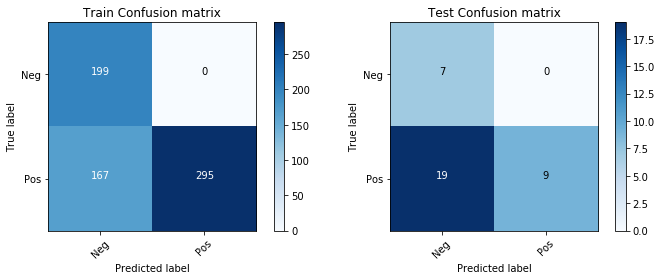

In [45]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_confusion_matrix(cf_matrix_train, classes=['Neg', 'Pos'], title='Train Confusion matrix')
plt.subplot(122)
plot_confusion_matrix(cf_matrix_test, classes=['Neg', 'Pos'], title='Test Confusion matrix')
plt.show()

In [46]:
print('Train Results\n\n', classification_report(y_train, y_train_pred, target_names=['Neg', 'Pos']))

Train Results

               precision    recall  f1-score   support

         Neg       0.54      1.00      0.70       199
         Pos       1.00      0.64      0.78       462

   micro avg       0.75      0.75      0.75       661
   macro avg       0.77      0.82      0.74       661
weighted avg       0.86      0.75      0.76       661



In [47]:
print('Test Results\n\n', classification_report(y_test, y_test_pred, target_names=['Neg', 'Pos']))

Test Results

               precision    recall  f1-score   support

         Neg       0.27      1.00      0.42         7
         Pos       1.00      0.32      0.49        28

   micro avg       0.46      0.46      0.46        35
   macro avg       0.63      0.66      0.46        35
weighted avg       0.85      0.46      0.47        35



## Train the SVM classifier

In [48]:
# Using tf-idf docuement vector as features for the SVM classifier
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train[:, 2])
test_vectors = vectorizer.transform(X_test[:, 2])

In [49]:
print ("Train matrix shape " + str(train_vectors.shape))
print ("Test matrix shape " + str(test_vectors.shape))

In [50]:
print(vectorizer.get_feature_names()[:100])

['00', '000', '01', '06', '10', '100', '10min', '10pm', '10th', '11', '11pm', '12', '120', '13', '130ish', '1330', '135', '138', '14', '15', '16', '17', '18', '188', '18th', '1969', '1980', '1dollar', '1st', '20', '200', '2003', '2008', '2011', '2012', '2013', '2016', '2018', '20mins', '20pm', '20s', '21', '22', '24', '25', '250', '26', '28', '280', '29', '2ish', '2nd', '2pm', '2x', '30', '300', '30minutes', '30pm', '30s', '32', '33', '34', '35', '36', '38', '39', '3ish', '3pm', '3rd', '40', '40sgd', '44', '45', '4th', '50', '500', '50pm', '54', '57', '5min', '5pc', '5s', '5th', '5x', '60', '630pm', '645pm', '68', '69', '6pm', '6th', '70', '730pm', '75', '7pm', '80', '80ft', '80s', '81', '82']


In [51]:
# Train the SVM classifier
svm = SVC(gamma='auto')
svm.fit(train_vectors, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
y_train_predsvm = svm.predict(train_vectors)
y_test_predsvm = svm.predict(test_vectors)

In [53]:
cf_matrix_trainsvm = confusion_matrix(y_train, y_train_predsvm)
cf_matrix_trainsvm

array([[  0, 199],
       [  0, 462]])

In [54]:
cf_matrix_testsvm = confusion_matrix(y_test, y_test_predsvm)
cf_matrix_testsvm

array([[ 0,  7],
       [ 0, 28]])

Confusion matrix, without normalization
[[  0 199]
 [  0 462]]
Confusion matrix, without normalization
[[ 0  7]
 [ 0 28]]


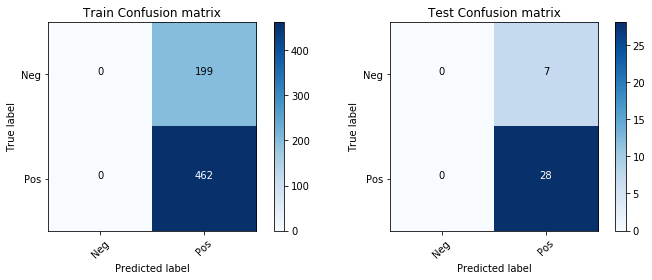

In [55]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_confusion_matrix(cf_matrix_trainsvm, classes=['Neg', 'Pos'], title='Train Confusion matrix')
plt.subplot(122)
plot_confusion_matrix(cf_matrix_testsvm, classes=['Neg', 'Pos'], title='Test Confusion matrix')
plt.show()

In [56]:
print('Train Results\n\n', classification_report(y_train, y_train_predsvm, target_names=['Neg', 'Pos']))

Train Results

               precision    recall  f1-score   support

         Neg       0.00      0.00      0.00       199
         Pos       0.70      1.00      0.82       462

   micro avg       0.70      0.70      0.70       661
   macro avg       0.35      0.50      0.41       661
weighted avg       0.49      0.70      0.58       661



/home/tkokkeng/Documents/EB5204-NMSM/CA1/venv/lib64/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [57]:
print('Test Results\n\n', classification_report(y_test, y_test_predsvm, target_names=['Neg', 'Pos']))

Test Results

               precision    recall  f1-score   support

         Neg       0.00      0.00      0.00         7
         Pos       0.80      1.00      0.89        28

   micro avg       0.80      0.80      0.80        35
   macro avg       0.40      0.50      0.44        35
weighted avg       0.64      0.80      0.71        35



/home/tkokkeng/Documents/EB5204-NMSM/CA1/venv/lib64/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Results

In [58]:
train_df = pd.DataFrame(X_train, columns=[i for i in reviews_df.columns if i!='PosNeg'])
train_df['PosNeg'] = train_df['reviewRating'] > 3
train_df['predicted_NB'] = y_train_pred
train_df['predicted_SVM'] = y_train_predsvm

In [59]:
train_df.iloc[:5, :8]

,author,datePublished,description,reviewRating,name,cuisine,desc_tokenised,PosNeg
0,Dru C.,2012-10-23,"I've eaten at the DTF location in Arcadia, CA ...",4,Din Tai Fung,Chinese,"[I, 've, eaten, at, the, DTF, location, in, Ar...",True
1,Tram N.,2016-03-13,Overrated. \n\nIf you order 1 or 2 orders of d...,3,Din Tai Fung,Chinese,"[Overrated, ., If, you, order, 1, or, 2, order...",False
2,Tian B.,2016-09-23,Wasn't expecting much as my impression of Chij...,4,El Mero Mero,Mexican,"[Was, n't, expecting, much, as, my, impression...",True
3,John A.,2014-07-22,I loved this place! Very friendly staff and f...,4,The Curry Cultures,Indian,"[I, loved, this, place, !, Very, friendly, sta...",True
4,Ross N.,2016-05-07,Great spot found on tripadvisor. Terrific curr...,4,The Curry Cultures,Indian,"[Great, spot, found, on, tripadvisor, ., Terri...",True


In [60]:
train_df.iloc[:5, 8:]

In [61]:
test_df['PosNeg'] = test_df['reviewRating'] > 3
test_df['predicted_NB'] = y_test_pred
test_df['predicted_SVM'] = y_test_predsvm

In [62]:
test_df.iloc[:5, 2:]

,description,reviewRating,name,cuisine,desc_tokenised,PosNeg,predicted_NB,predicted_SVM
0,The ambience is quite clean and casual. \n\nTh...,2,Osaka Ohsho,Japanese,"[The, ambience, is, quite, clean, and, casual,...",False,-1,1
1,I loved this place! Very friendly staff and f...,4,The Curry Cultures,Indian,"[I, loved, this, place, !, Very, friendly, sta...",True,1,1
2,"Amazing, delicious and taste buds are happy. ...",5,The Curry Cultures,Indian,"[Amazing, ,, delicious, and, taste, buds, are,...",True,1,1
3,We had a chicken biryani which was fine. The a...,3,The Curry Cultures,Indian,"[We, had, a, chicken, biryani, which, was, fin...",False,-1,1
4,Place is alright. I got few types of tacos. I...,3,Vatos Urban Tacos,Mexican,"[Place, is, alright, ., I, got, few, types, of...",False,-1,1


In [63]:
# Save to csv file
train_df.to_csv(os.path.join('data', 'results', 'train_scored.csv'), index=False)
test_df.to_csv(os.path.join('data', 'results', 'test_scored.csv'), index=False)

In [64]:
train_df.groupby('name').groups

{'Café Iguana': Int64Index([  9,  20,  30,  59,  80,  99, 110, 118, 129, 180, 185, 224, 232,
             238, 251, 289, 326, 344, 368, 382, 383, 395, 425, 441, 444, 454,
             463, 497, 506, 525, 532, 536, 554, 593, 605, 643],
            dtype='int64'),
 'Din Tai Fung': Int64Index([  0,   1,  32,  42,  62,  67,  69,  84, 111, 125, 130, 135, 153,
             189, 197, 239, 253, 279, 290, 313, 349, 367, 413, 419, 438, 451,
             468, 488, 502, 505, 553, 567, 570, 583, 585, 596, 601, 602, 630,
             633, 635, 646, 652],
            dtype='int64'),
 'El Mero Mero': Int64Index([  2,  17,  18,  46,  49, 108, 121, 144, 167, 188, 198, 206, 208,
             225, 246, 299, 307, 315, 403, 407, 418, 422, 455, 462, 489, 521,
             535, 541, 545, 642],
            dtype='int64'),
 'First Thai Food': Int64Index([16, 35, 132, 210, 248, 266, 327, 355, 432, 453], dtype='int64'),
 'Garibaldi Italian Restaurant & Bar': Int64Index([48, 89, 114, 184, 194, 204, 212, 311, 321, 

In [65]:
# Create json
train_json = {}

cuisine_group = train_df.groupby('cuisine').groups

for a_cuisine in cuisine_group.keys():

    restaurant_group = train_df.loc[cuisine_group[a_cuisine], :].groupby('name').groups
    cuisine_list = []
    for a_restaurant in restaurant_group.keys():
        d = {}
        d['name'] = a_restaurant
        reviews_list = train_df.loc[restaurant_group[a_restaurant], ['description', 'predicted_NB', 'predicted_SVM']].to_dict('records')
        d['nb_reviews'] = len(reviews_list)
        d['reviews'] = reviews_list
        cuisine_list.append(d)
    train_json[a_cuisine] = cuisine_list

In [66]:
train_json.keys()

dict_keys(['Chinese', 'French', 'Indian', 'Italian', 'Japanese', 'Mexican', 'Thai'])

In [67]:
len(train_json['Chinese'])

3

In [68]:
[ i['name'] for i in train_json['Chinese'] ]

['Din Tai Fung', 'Lei Garden', 'Tim Ho Wan']

In [69]:
for i in train_json.keys():
    print([ j['name'] for j in train_json[i] ])

['Din Tai Fung', 'Lei Garden', 'Tim Ho Wan']
['Prego']
['Khansama Tandoori', 'The Curry Cultures', 'Zam Zam Restaurant']
['Garibaldi Italian Restaurant & Bar', 'Trattoria Lafiandra']
['Menya Musashi', 'Osaka Ohsho', 'Standing Sushi Bar', 'The Sushi Bar']
['Café Iguana', 'El Mero Mero', 'Piedra Negra', 'Vatos Urban Tacos']
['First Thai Food', 'Jai Thai', 'Yhingthai Palace']


In [70]:
with open(os.path.join('data', 'results', 'day2<genesis>-train.json'), 'w') as outfile:
    json.dump(train_json, outfile)